# Imbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### First, download the data from: https://drive.google.com/uc?id=1oRNf2muX8VLH8ky5F_cTgGYbHlD-ZwVK&export=download. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

data= pd.read_csv(r"C:\Users\rana_\IronhackDA\DAFT_212\module_3\Lab_12_Imbalance\paysim.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [21]:
#data.step.value_counts()

In [22]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

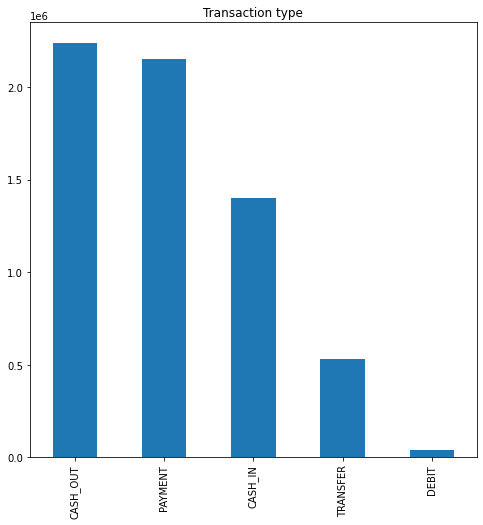

In [23]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(8,8))
plt.show()

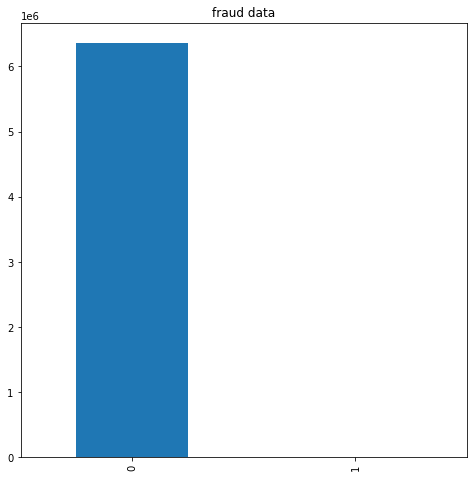

In [24]:
f, ax = plt.subplots(1, 1, figsize=(8, 8))
data.isFraud.value_counts().plot(kind='bar', title="fraud data", ax=ax, figsize=(8,8))
plt.show()

In [25]:
data.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

C:\Users\rana_\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='isFraud', ylabel='Density'>

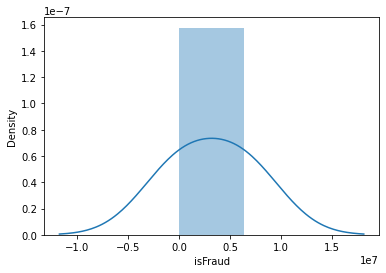

In [26]:
sns.distplot(data.isFraud.value_counts())


In [27]:
# the data is highly imbalanced

### What is the distribution of the outcome? 

In [28]:
# Your response here
#the distribution is right skewed

### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [29]:
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

<Figure size 720x432 with 0 Axes>

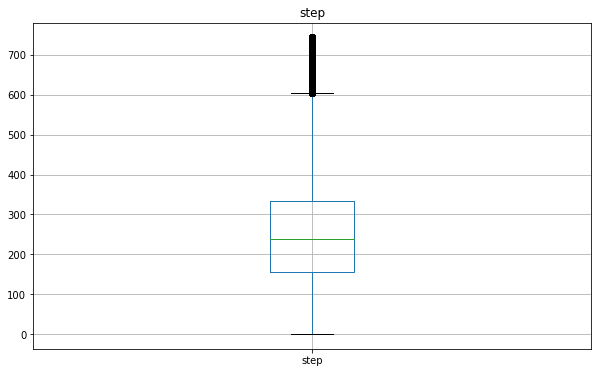

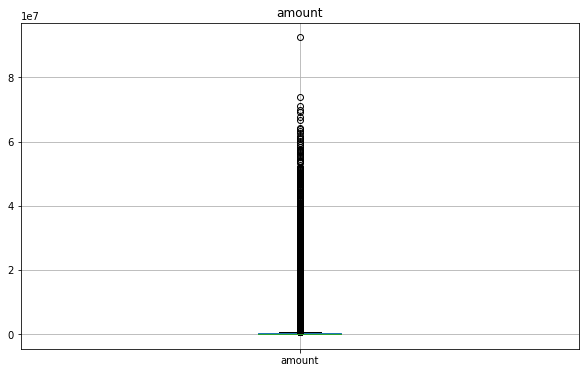

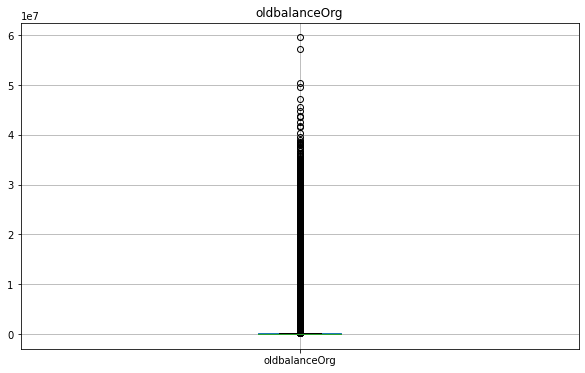

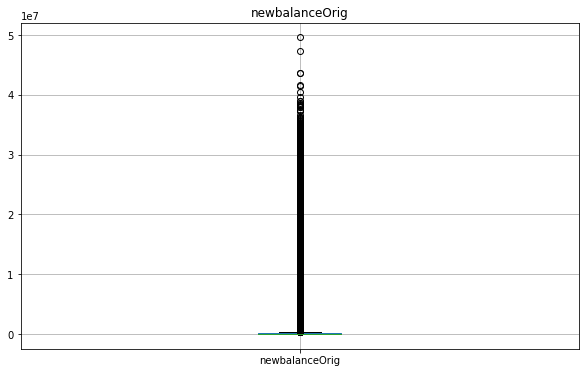

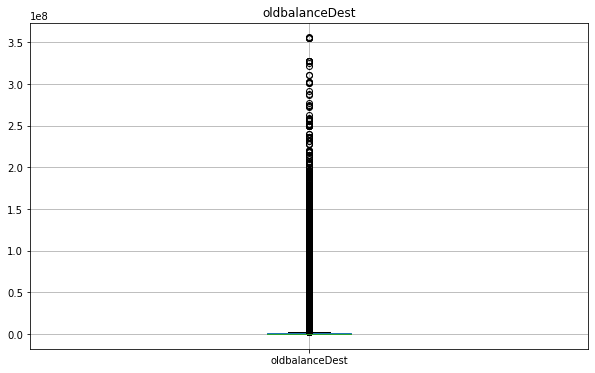

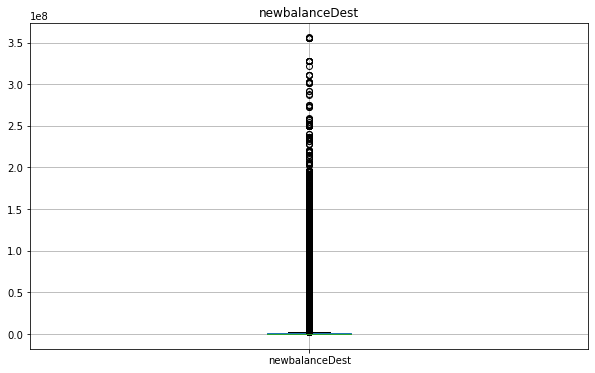

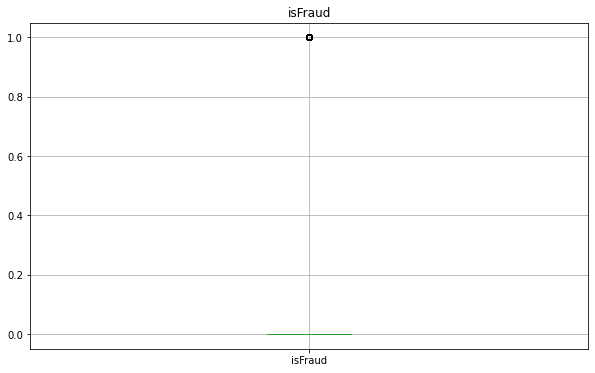

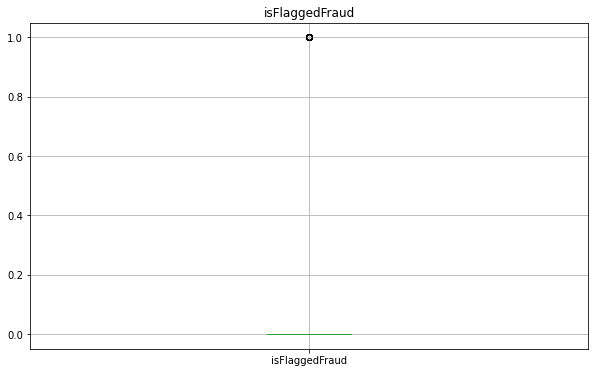

In [30]:
# Your code here
#Check Outliers
num_df = data.select_dtypes(exclude=['object'])
# Plot the variables (loop for plot variables) for num values
plt.figure(figsize=(10, 6))
for col in num_df:
    plt.figure(figsize=(10, 6))
    data.boxplot(column=[col])
    plt.title(col)
    plt.savefig(col+r'.png',bbox_inches='tight')

In [31]:
data.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [32]:
data.drop(['oldbalanceOrg','oldbalanceDest'], axis=1, inplace=True)

In [33]:
data

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.00,0,0
...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,0.00,C776919290,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,0.00,C1881841831,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,0.00,C1365125890,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,0.00,C2080388513,0.00,1,0


In [34]:
data['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M2003088642      1
M865106385       1
M1759262013      1
M548177208       1
M562690515       1
Name: nameDest, Length: 2722362, dtype: int64

In [35]:
(data.nameDest.nunique()/data.shape[0])*100

42.78680795018404

In [36]:
# 42 % of data.nameDest are unique so we can drop the column
data.drop(['nameDest'], axis=1, inplace=True)

In [37]:
data.nameOrig.nunique()



6353307

In [38]:
(data.nameOrig.nunique()/data.shape[0])*100




99.85362947967975

In [39]:
# 99% are unique, so we can drop the colum
data.drop(['nameOrig'], axis=1, inplace=True)

In [40]:
data

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,160296.36,0.00,0,0
1,1,PAYMENT,1864.28,19384.72,0.00,0,0
2,1,TRANSFER,181.00,0.00,0.00,1,0
3,1,CASH_OUT,181.00,0.00,0.00,1,0
4,1,PAYMENT,11668.14,29885.86,0.00,0,0
...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,0.00,6379898.11,1,0
6362618,743,TRANSFER,850002.52,0.00,0.00,1,0


In [41]:
data.dtypes

step                int64
type               object
amount            float64
newbalanceOrig    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [43]:
import datetime
print("Step data can be the seconds since first record, so if we define a start date time we can use this field to create a scaled date time field")
print("In this case, and after reading description in Kaggle we know that the steps is the amount of hours passed since a certain start point")
# Let's create a new scalled time
start_datetime =  datetime.datetime(2020, 2, 17, 0,00) # Let's use 1st day of bootcamp as startpoint
data['datetime'] = data.apply(lambda x: start_datetime + datetime.timedelta(hours=x['step']), axis=1)

Step data can be the seconds since first record, so if we define a start date time we can use this field to create a scaled date time field
In this case, and after reading description in Kaggle we know that the steps is the amount of hours passed since a certain start point


In [44]:
data.dtypes

step                       int64
type                      object
amount                   float64
newbalanceOrig           float64
newbalanceDest           float64
isFraud                    int64
isFlaggedFraud             int64
datetime          datetime64[ns]
dtype: object

In [45]:
# Create dummies form transfer type
dummies = pd.get_dummies(data['type'])
data_dummies = pd.concat([data, dummies], axis=1)

In [16]:
from sklearn import preprocessing

In [17]:
# encoding



encoder =preprocessing.LabelEncoder()
for i in data.columns:
    if data[i].dtypes == "object":
         data[i] = encoder.fit_transform(data[i])
    if data[i].dtypes == "bool":
         data[i] = encoder.fit_transform(data[i])

In [18]:
data

,step,type,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,160296.36,0.00,0,0
1,1,3,1864.28,19384.72,0.00,0,0
2,1,4,181.00,0.00,0.00,1,0
3,1,1,181.00,0.00,0.00,1,0
4,1,3,11668.14,29885.86,0.00,0,0
...,...,...,...,...,...,...,...
6362615,743,1,339682.13,0.00,339682.13,1,0
6362616,743,4,6311409.28,0.00,0.00,1,0
6362617,743,1,6311409.28,0.00,6379898.11,1,0
6362618,743,4,850002.52,0.00,0.00,1,0


### Run a logisitc regression classifier and evaluate its accuracy.

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [47]:
data_dummies['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [53]:
data_dummies.dtypes

step                       int64
type                      object
amount                   float64
newbalanceOrig           float64
newbalanceDest           float64
isFraud                    int64
isFlaggedFraud             int64
datetime          datetime64[ns]
CASH_IN                    uint8
CASH_OUT                   uint8
DEBIT                      uint8
PAYMENT                    uint8
TRANSFER                   uint8
dtype: object

In [54]:
data_dummies.drop(['type'], axis=1, inplace=True)

In [55]:
# Deal with scalling
majority = data_dummies[data_dummies['isFraud'] == 0]
minority = data_dummies[data_dummies['isFraud'] == 1]
 
# Downsample majority class
majority_downsampled = resample(majority, replace=False, n_samples=len(minority), random_state=123)

# Combine minority class with downsampled majority class
data_downsampled = pd.concat([majority_downsampled, minority])

data_downsampled['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [56]:
# Your code here

y = data_downsampled['isFraud']
X = data_downsampled.drop(['isFraud','datetime'], axis=1)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13140, 10) (3286, 10) (13140,) (3286,)


In [57]:
# Create and train Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [58]:
# Make a prediction
y_pred = model.predict(X_test)

In [59]:
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = 100 * accuracy
accuracy_percentage

69.0809494826537

In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix,  precision_score, recall_score, f1_score
print('precision: ', precision_score(y_test,y_pred))
print('recall:    ', recall_score(y_test, y_pred))
print('f1_score:  ', f1_score(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

precision:  0.636744966442953
recall:     0.9100719424460432
f1_score:   0.7492596248766041
[[ 752  866]
 [ 150 1518]]


### Now pick a model of your choice and evaluate its accuracy.

In [61]:

# Your code here
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [62]:
# Make a prediction
knn_predict = knn.predict(X_test)

In [63]:
knn_accuracy = accuracy_score(y_test, knn_predict)
knn_accuracy_percentage = 100 * knn_accuracy
knn_accuracy_percentage

81.9841752891053

### Which model worked better and how do you know?

In [64]:
# Your response here
# Your response here
print("By the accuracy percentage we can see that the model that works best is the KNN model, even without tunning on the number of clusters the difference is quite big.")

By the accuracy percentage we can see that the model that works best is the KNN model, even without tunning on the number of clusters the difference is quite big.


### Let's use NearMiss method for undersampling and compare the results with previous

### And now let's apply SMOTE

### Apply your model on improved data

### Calculate classification report for imbalanced data to evaluate the models

### What is your conclusion?